In [67]:
'''<br>
@Author: Venkatesh <br>
@Date: 2024-11-09  <br>
@Last Modified by: Venkatesh <br>
@Last Modified time: 2024-11-10 <br>
@Title: simple linear regression <br>
'''

'<br>\n@Author: Venkatesh <br>\n@Date: 2024-11-09  <br>\n@Last Modified by: Venkatesh <br>\n@Last Modified time: 2024-11-10 <br>\n@Title: simple linear regression <br>\n'

Simple Linear Regression

1. Build a predictive linear regression model for given dataset, train the model for
training set and test it against test dataset, plot the model using any plotting
library.
Dataset url -
https://drive.google.com/open?id=17Z5YVgk4hSzPvguWkck6tRb6Z2JEWdgh

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

import os

In [69]:
# step-2 read the data
# Load the dataset
url_1 = "D:/ML/train.csv"
url_2= "D:/ML/test.csv"
train_data = pd.read_csv(url_1)
test_data= pd.read_csv(url_2)



In [70]:
# Explore the data
print(train_data.head())


      x          y
0  24.0  21.549452
1  50.0  47.464463
2  15.0  17.218656
3  38.0  36.586398
4  87.0  87.288984


In [71]:
# Check for missing values in each column
print(train_data.isnull().sum())
 # or
# Check data info to identify missing values and column types
print(train_data.info())

x    0
y    1
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB
None


In [72]:
# Step 3: Drop rows with NaN values in 'y' in both datasets (if any)
train_data = train_data.dropna(subset=['y'])
test_data = test_data.dropna(subset=['y'])

In [73]:
# Step 4: Split the datasets into features (X) and target (y)
X_train = train_data[['x']]  
y_train = train_data['y']     
X_test = test_data[['x']]     
y_test = test_data['y'] 

In [74]:
# Use pd.get_dummies for one-hot encoding if there are categorical columns
# data = pd.get_dummies(data, columns=['categorical_column'], drop_first=True)

In [75]:
# Step 5: Scale the features (optional)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [76]:
# Step 6: Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [77]:
# Step 7: Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


In [78]:
# Step 8: Evaluate the model
print("Training MSE:", mean_squared_error(y_train, y_train_pred))
print("Test MSE:", mean_squared_error(y_test, y_test_pred))
print("R^2 score:", r2_score(y_test, y_test_pred))


Training MSE: 7.867752733487687
Test MSE: 9.43292219203933
R^2 score: 0.9888014444327563


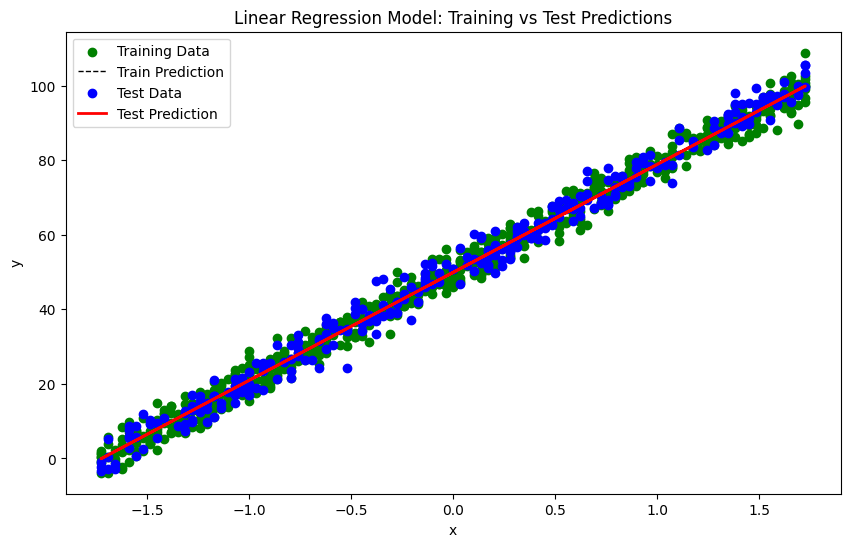

In [79]:
# Step 9: Plot the model's predictions and differentiate training and test data
plt.figure(figsize=(10, 6))

# Plot training data
plt.scatter(X_train, y_train, color='green', label='Training Data')
plt.plot(X_train, y_train_pred, color='black', linestyle='--', linewidth=1, label='Train Prediction')

# Plot test data
plt.scatter(X_test, y_test, color='blue', label='Test Data')
plt.plot(X_test, y_test_pred, color='red', linewidth=2, label='Test Prediction')

# Labels and legend
plt.xlabel('x')  
plt.ylabel('y')  
plt.legend()
plt.title('Linear Regression Model: Training vs Test Predictions')
plt.show()